In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle

Splitting data set into training and test sets

In [2]:
df = pd.read_csv("data_set/bal_set.csv")
X = df[df.columns[:-4]]
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=425)

Define cross-validation for a given model and data set

In [3]:
def X_validation(model, X_train, y_train, cv=5):
    # re-combine X and y
    X_train['y'] = y_train
    # backup dataframe
    df = X_train.copy()
    # re-ordering
    df = shuffle(df)
    # equally split
    cv_set = np.array_split(df, cv)
    # initialize accuracies
    train_acc, val_acc = [], []
    for i in range(5):
        # define test and train for CV
        test = pd.DataFrame(cv_set[i])
        train = pd.DataFrame(np.vstack([tab for k, tab in enumerate(cv_set) if k!=i]))
        X_train = train[train.columns[:-1]]
        y_train = train[train.columns[-1]]
        X_test = test[test.columns[:-1]]
        y_test = test[test.columns[-1]]
        # fit on train
        return X_train
        model.fit(X_train, y_train)
        # calculate training acc
        train_pred = model.predict(X_train)
        train_pred = [int(round(s)) for s in train_pred]
        trac = np.sum(y_train == train_pred)/y_train.shape[0]
        train_acc.append(trac)
        # calculate validation acc
        test_pred = model.predict(X_test)
        test_pred = [int(round(s)) for s in test_pred]
        teac = np.sum(y_test == test_pred)/y_test.shape[0]
        val_acc.append(teac)

    mean_train_acc = np.mean(train_acc)
    std_train_acc = np.std(train_acc)
    mean_val_acc = np.mean(val_acc)
    std_val_acc = np.std(val_acc)
    
    return mean_train_acc, std_train_acc, mean_val_acc, std_val_acc

In [5]:
rf = RandomForestRegressor(n_estimators=2, max_features=4, 
                               min_samples_leaf=2, random_state=425, 
                               n_jobs=-1, verbose=0)
df = X_validation(rf, X_train, y_train, cv=5)

/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Using cross-validation to estimate the minimum best `n_estimators`

In [4]:
n_estimators = [10,20,40,60,80,100,150,200,250,300,350,400,500]
t_elap, train_acc, train_acc_err, val_acc, val_acc_err = [], [], [], [], []
for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n, max_features=4, 
                               min_samples_leaf=2, random_state=425, 
                               n_jobs=-1, verbose=0)
    start_time = time.time()
    a, b, c, d = X_validation(rf, X_train, y_train, cv=5)
    t = (time.time() - start_time)/5
    t_elap.append(t)
    train_acc.append(a)
    train_acc_err.append(b)
    val_acc.append(c)
    val_acc_err.append(d)
    print("n_estimators:{}, time elapsed:{}, train acc:{}+/-{}, val acc:{}+/-{}".format(n,t,a,b,c,d))

/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:10, time elapsed:26.914812803268433, train acc:0.997442578125+/-3.3797528744242226e-05, val acc:0.9911265625000001+/-0.00010497860645149812


/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:20, time elapsed:59.19120354652405, train acc:0.9977867187500001+/-4.285140226152193e-05, val acc:0.9915453125000001+/-0.000168605262002706


/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:40, time elapsed:134.81372876167296, train acc:0.9978738281249999+/-3.499529125688343e-05, val acc:0.9916874999999999+/-0.00015834532575198244


/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:60, time elapsed:199.6413609981537, train acc:0.9979542968749999+/-3.442379349511837e-05, val acc:0.9918156249999999+/-0.0002305203861646454


/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:80, time elapsed:239.64828543663026, train acc:0.9979765625000001+/-2.294402368062761e-05, val acc:0.9918265625+/-0.00015168326374390148


/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:100, time elapsed:201.58159904479982, train acc:0.9979722656250001+/-2.667714231088293e-05, val acc:0.9918828124999999+/-0.00030430665300398743


/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:150, time elapsed:524.7911843776703, train acc:0.997978515625+/-1.8446435864256738e-05, val acc:0.9919296874999999+/-0.0002850438562747805


/Users/ymon0003/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


n_estimators:200, time elapsed:580.1069278240204, train acc:0.998001953125+/-2.240567249952401e-05, val acc:0.9919781249999999+/-0.0001944292528787881


In [5]:
df = pd.DataFrame()
df['n_estimators'] = n_estimators
df['t_elap'] = t_elap
df['train_acc'] = train_acc
df['train_acc_err'] = train_acc_err
df['val_acc'] = val_acc
df['val_acc_err'] = val_acc_err
df.to_csv("n_est_result.csv", index=False)

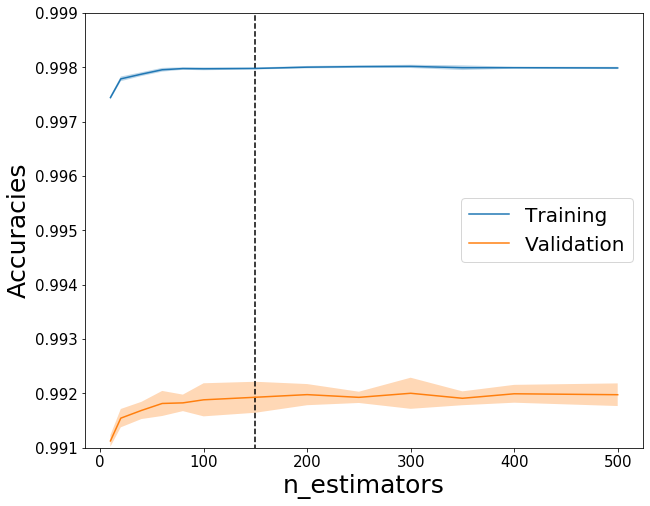

In [43]:
plt.figure(figsize=(10,8))
plt.plot(df.n_estimators,df.train_acc, label='Training')
plt.fill_between(df.n_estimators, df.train_acc-df.train_acc_err, df.train_acc+df.train_acc_err, alpha=0.3)
plt.plot(df.n_estimators,df.val_acc, label='Validation')
plt.fill_between(df.n_estimators, df.val_acc-df.val_acc_err, df.val_acc+df.val_acc_err, alpha=0.3)
plt.vlines(150,ymin=0.9,ymax=1.1, linestyle='--')
plt.ylim(0.991, 0.999)
plt.xlabel(r'n_estimators', fontsize=25)
plt.ylabel(r'Accuracies', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)

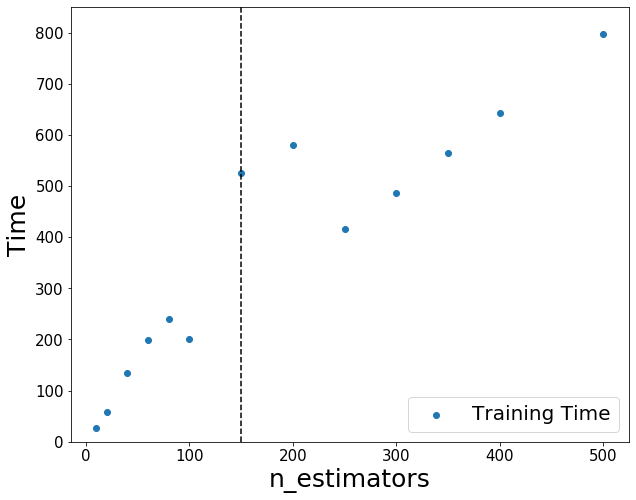

In [52]:
df = pd.read_csv("n_est_result.csv")
plt.figure(figsize=(10,8))
plt.scatter(df.n_estimators,df.t_elap, label='Training Time')
plt.vlines(150,ymin=0,ymax=900, linestyle='--')
plt.xlabel(r'n_estimators', fontsize=25)
plt.ylabel(r'Time', fontsize=25)
plt.ylim(0,850)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20, loc=4)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

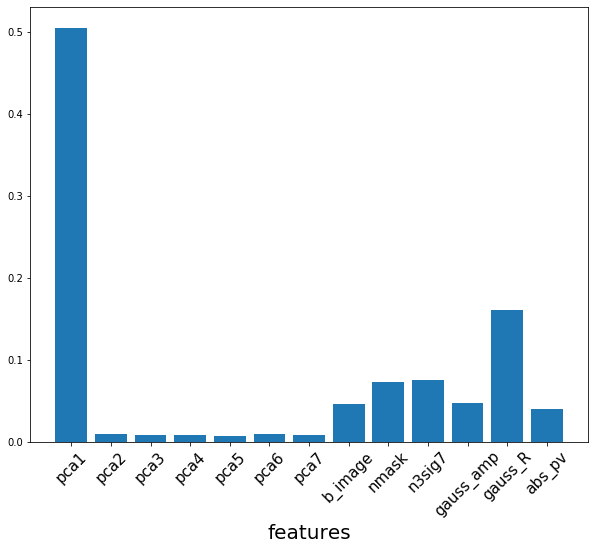

In [11]:
rf = pickle.load(open("rf.m", "rb"))
X_col = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'b_image',
            'nmask', 'n3sig7', 'gauss_amp', 'gauss_R', 'abs_pv']
plt.figure(figsize=(10,8))
plt.bar(X_col, rf.feature_importances_)
plt.xlabel("features", fontsize=20)
plt.xticks(fontsize=15, rotation=45)